# 1. Project Overview

This notebook presents the exploratory and analytical steps for the project **"EV Charging Stations in Turkey: Geographical and Service-Based Segmentation"**. The aim is to uncover the spatial and functional landscape of EV charging stations across Turkey.

---



# 2. Data Loading

In this section, we load the JSON data into a pandas DataFrame, flatten nested structures, and get a first look at the dataset.

---

In [11]:
import json
import pandas as pd

# Load dataset (adjust path as needed)
with open('../data/ev_charging_stations.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Flatten nested JSON (sockets, amenities, etc.)
df = pd.json_normalize(data, record_path=['istasyons', 'sokets'],
    meta=[
        'tesis_id', 'tesis_adi', 'tesis_adres', 'tesis_lokasyon_lat', 'tesis_lokasyon_long',
        'tesis_il', 'tesis_ilce', 'owner', 'karayollari_icinde_mi', 'marker_type',
        'available', 'active', 'public', 'is_online', 'dc_count', 'ac_count', 'services'
    ],
    errors='ignore'
)
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (327, 28)


,soket_id,soket_state,sarj_state,soket_tipi,kW_ucret,akim,voltaj,max_kW,total_kW,guncel_tutar,...,owner,karayollari_icinde_mi,marker_type,available,active,public,is_online,dc_count,ac_count,services
0,1,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': True, 'restoran': True, 'kafe': Tr..."
1,2,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': True, 'restoran': True, 'kafe': Tr..."
2,1,Occupied,Charging,CCS,9.55,167.342567,371.432617,62156.487478,4.45,42.5,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': False, 'restoran': False, 'kafe': ..."
3,2,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': False, 'restoran': False, 'kafe': ..."
4,1,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': False, 'restoran': False, 'kafe': ..."


# 3. Initial Data Inspection

We examine the columns, data types, and overall structure. We also check for missing values and get a feel for the dataset.

---

In [12]:
# View columns and data types
df.info()

# First 5 Row
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   soket_id               327 non-null    object 
 1   soket_state            327 non-null    object 
 2   sarj_state             327 non-null    object 
 3   soket_tipi             327 non-null    object 
 4   kW_ucret               327 non-null    float64
 5   akim                   327 non-null    float64
 6   voltaj                 327 non-null    float64
 7   max_kW                 327 non-null    float64
 8   total_kW               327 non-null    float64
 9   guncel_tutar           327 non-null    float64
 10  son_sarj_suresi        291 non-null    object 
 11  tesis_id               327 non-null    object 
 12  tesis_adi              327 non-null    object 
 13  tesis_adres            327 non-null    object 
 14  tesis_lokasyon_lat     327 non-null    object 
 15  tesis_

,soket_id,soket_state,sarj_state,soket_tipi,kW_ucret,akim,voltaj,max_kW,total_kW,guncel_tutar,...,owner,karayollari_icinde_mi,marker_type,available,active,public,is_online,dc_count,ac_count,services
0,1,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': True, 'restoran': True, 'kafe': Tr..."
1,2,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': True, 'restoran': True, 'kafe': Tr..."
2,1,Occupied,Charging,CCS,9.55,167.342567,371.432617,62156.487478,4.45,42.5,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': False, 'restoran': False, 'kafe': ..."
3,2,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': False, 'restoran': False, 'kafe': ..."
4,1,Available,Idle,CCS,9.55,0.000000,0.000000,0.000000,0.00,0.0,...,POWERSARJ,True,DC,True,True,True,True,1,0,"{'otopark': False, 'restoran': False, 'kafe': ..."


In [13]:
# Descriptive statistics and missing values
df.describe(include='all')
print("Missing value count:\n", df.isnull().sum())

Missing value count:
 soket_id                   0
soket_state                0
sarj_state                 0
soket_tipi                 0
kW_ucret                   0
akim                       0
voltaj                     0
max_kW                     0
total_kW                   0
guncel_tutar               0
son_sarj_suresi           36
tesis_id                   0
tesis_adi                  0
tesis_adres                0
tesis_lokasyon_lat         0
tesis_lokasyon_long        0
tesis_il                   0
tesis_ilce                 0
owner                      0
karayollari_icinde_mi      0
marker_type                0
available                  0
active                     0
public                     0
is_online                  0
dc_count                   0
ac_count                   0
services                 176
dtype: int64


# 4. Categorical Feature Distributions

We analyze the distributions of key categorical variables such as city, district, marker type, and availability.

---

In [14]:
print("City distribution:\n", df['tesis_il'].value_counts())
print("District distribution:\n", df['tesis_ilce'].value_counts().head(10))
print("Marker type distribution:\n", df['marker_type'].value_counts())
print("Availability:\n", df['available'].value_counts())

City distribution:
 tesis_il
İstanbul          127
Malatya            28
Konya              26
Karaman            25
Mersin             13
Kocaeli            11
Kastamonu          10
Antalya            10
Bursa              10
Tekirdağ            6
Muğla               5
Kahramanmaraş       5
Istanbul            5
Sakarya             4
Şırnak              4
Hatay               4
Gaziantep           4
Isparta             3
istanbul            2
Balıkesir           2
Adıyaman            2
Adana               2
Aksaray             2
Trabzon             2
Diyarbakır          2
Erzurum             2
Niğde               2
Ankara              2
Afyonkarahisar      2
Şanlıurfa           1
Sivas               1
İzmir               1
Kayseri             1
Bartın              1
Name: count, dtype: int64
District distribution:
 tesis_ilce
Merkez        40
Akçadağ       28
Sarıyer       26
Üsküdar       24
Beşiktaş      20
Beylikdüzü    12
Pendik         7
Karatay        7
Nilüfer        6
Selçuklu 

# 5. Amenities (Services) Extraction and Analysis

We extract the nested services dictionary into separate columns and analyze the prevalence of different amenities across stations.

---

In [15]:
# Unpack amenities/services to separate columns
services_df = df['services'].apply(pd.Series)
df = pd.concat([df.drop('services', axis=1), services_df], axis=1)

# Analyze the percentage of stations with each amenity
amenities = ['otopark', 'restoran', 'kafe', 'market', 'wifi', 'wc', 'oyun_alani']
for amenity in amenities:
    if amenity in df.columns:
        oran = df[amenity].mean() * 100
        print(f"{amenity.title()} station rate found: %{oran:.1f}")

Otopark station rate found: %63.6
Restoran station rate found: %51.0
Kafe station rate found: %54.3
Market station rate found: %31.8
Wifi station rate found: %17.2
Wc station rate found: %90.7
Oyun_Alani station rate found: %7.3


# 6. Data Cleaning and Standardization

In this section, we clean and standardize categorical columns (e.g., city names), and mark stations with missing service information. This step is essential before advanced analysis and visualization.

---

In [16]:
import unidecode

# Standardize city names (capitalize, fix Turkish/English, remove whitespace)
def standardize_city_name(city):
    if pd.isnull(city):
        return city
    city = city.strip()
    city = city.replace("Istanbul", "İstanbul")
    city = city.replace("istanbul", "İstanbul")
    city = city.capitalize()
    return city

df['tesis_il'] = df['tesis_il'].apply(standardize_city_name)
df['tesis_ilce'] = df['tesis_ilce'].str.strip().str.capitalize()
df['marker_type'] = df['marker_type'].str.upper()
df['owner'] = df['owner'].str.upper()

# Mark stations with missing amenities information
df['has_services_info'] = df['otopark'].notnull()

print(df['tesis_il'].unique())
print("Stations with amenities info:", df['has_services_info'].sum())
print("Stations without amenities info:", (~df['has_services_info']).sum())

['Afyonkarahisar' 'Ankara' 'Antalya' 'Balıkesir' 'Bursa' 'Diyarbakır'
 'Erzurum' 'Gaziantep' 'Hatay' 'Isparta' 'Mersin' 'İstanbul' 'Kastamonu'
 'Kocaeli' 'Konya' 'Karaman' 'Kahramanmaraş' 'Muğla' 'Niğde' 'Sakarya'
 'Sivas' 'Tekirdağ' 'Trabzon' 'Şanlıurfa' 'Aksaray' 'İzmir' 'Kayseri'
 'Bartın' 'Adana' 'Adıyaman' 'Malatya' 'Şırnak']
Stations with amenities info: 151
Stations without amenities info: 176


# 7. Exploratory Data Analysis and Visualization (EDA)

In this section, we explore the geographical and functional distribution of EV charging stations in Turkey using various visualizations.

---

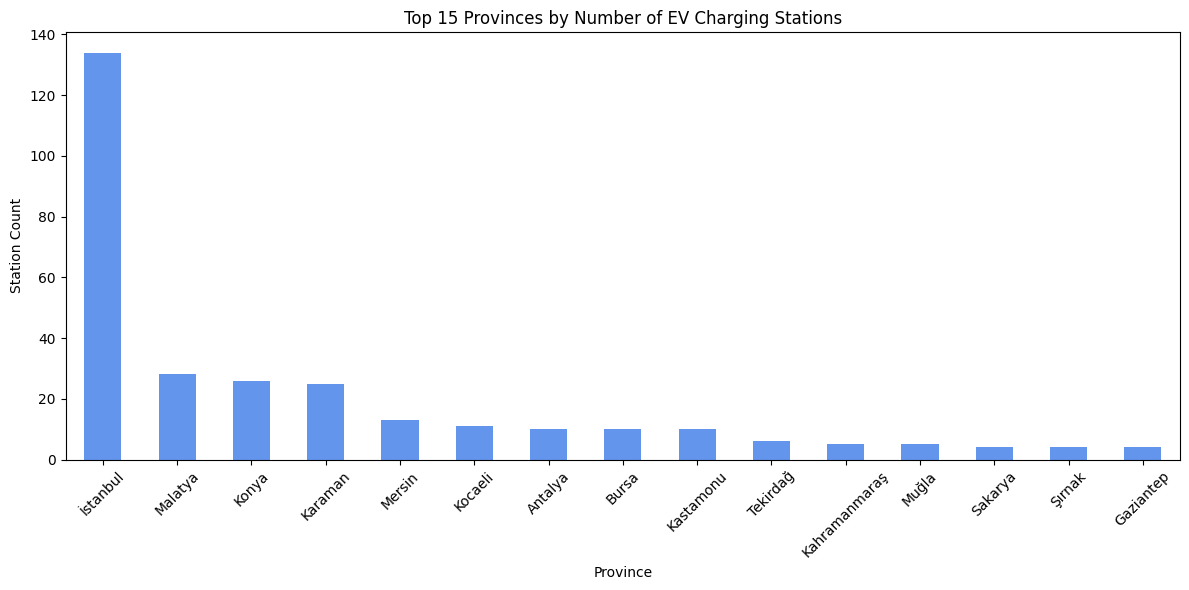

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Top 15 Provinces by Number of Charging Stations ---
plt.figure(figsize=(12,6))
df['tesis_il'].value_counts().head(15).plot(kind='bar', color='cornflowerblue')
plt.title('Top 15 Provinces by Number of EV Charging Stations')
plt.xlabel('Province')
plt.ylabel('Station Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

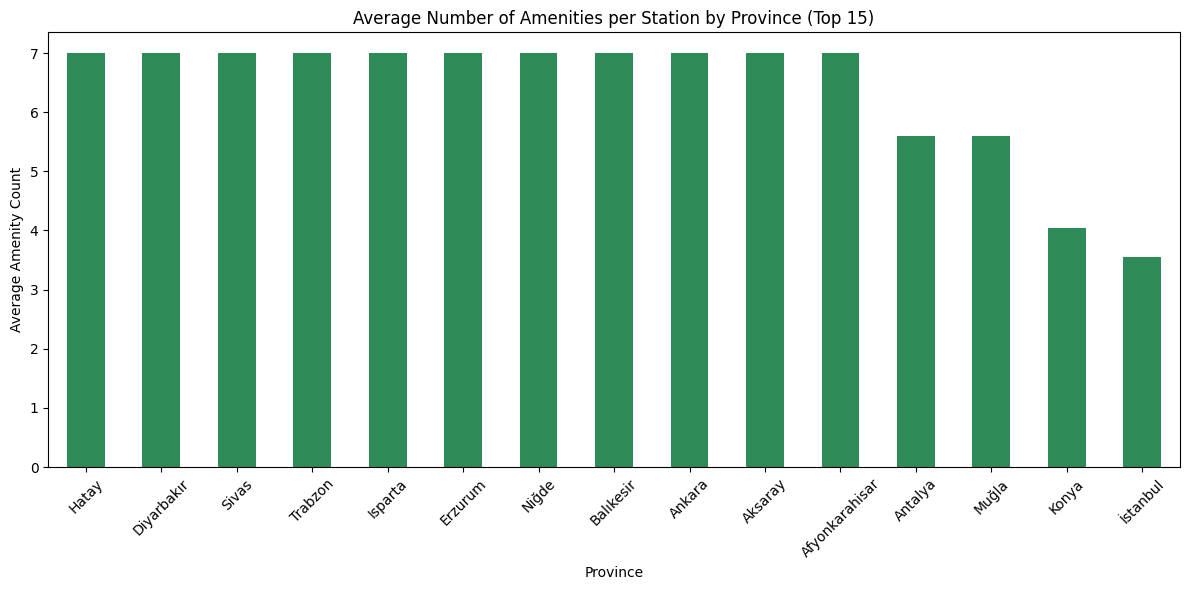

In [18]:
# --- Average Number of Amenities per Station by Province ---
service_cols = ['otopark', 'restoran', 'kafe', 'market', 'wifi', 'wc', 'oyun_alani']
df['num_services'] = df[service_cols].notnull().sum(axis=1)

mean_services = df.groupby('tesis_il')['num_services'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
mean_services.plot(kind='bar', color='seagreen')
plt.title('Average Number of Amenities per Station by Province (Top 15)')
plt.xlabel('Province')
plt.ylabel('Average Amenity Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

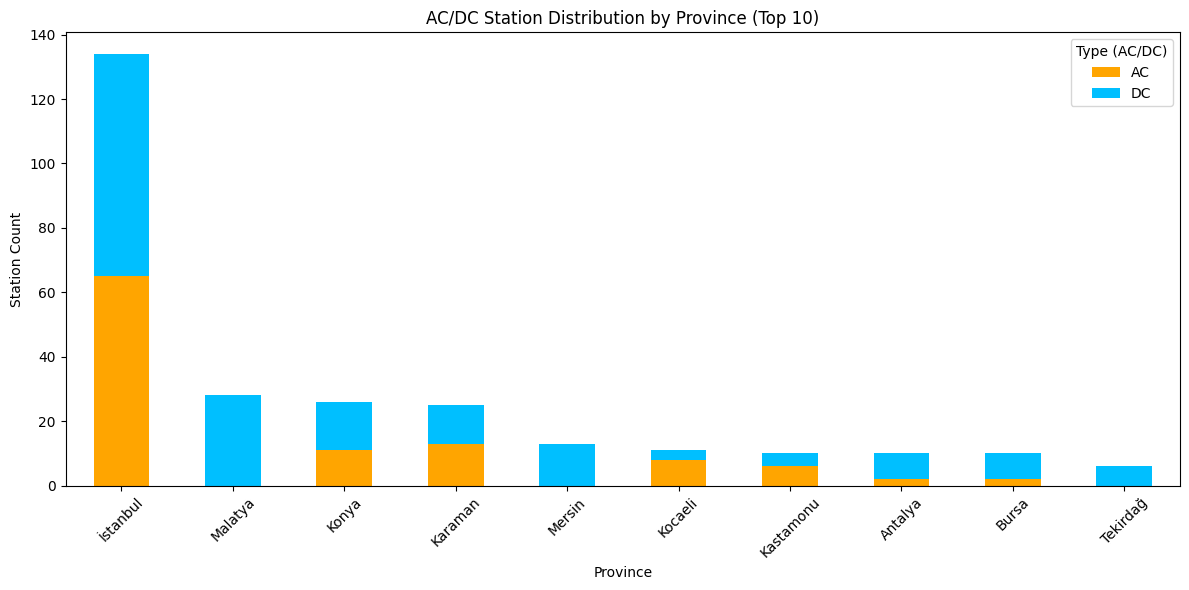

In [19]:
# --- AC/DC Distribution by Province (Stacked Bar for Top 10 Provinces) ---
ac_dc = pd.crosstab(df['tesis_il'], df['marker_type'])
ac_dc = ac_dc.loc[ac_dc.sum(axis=1).sort_values(ascending=False).head(10).index]

ac_dc.plot(kind='bar', stacked=True, figsize=(12,6), color=['orange', 'deepskyblue'])
plt.title('AC/DC Station Distribution by Province (Top 10)')
plt.xlabel('Province')
plt.ylabel('Station Count')
plt.xticks(rotation=45)
plt.legend(title='Type (AC/DC)')
plt.tight_layout()
plt.show()

/var/folders/hp/4691ncsd3fg95zjt0t_f75h80000gn/T/ipykernel_64200/1149440033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tesis_il', y='kW_ucret', data=df[df['tesis_il'].isin(selected_provinces)], palette='pastel')


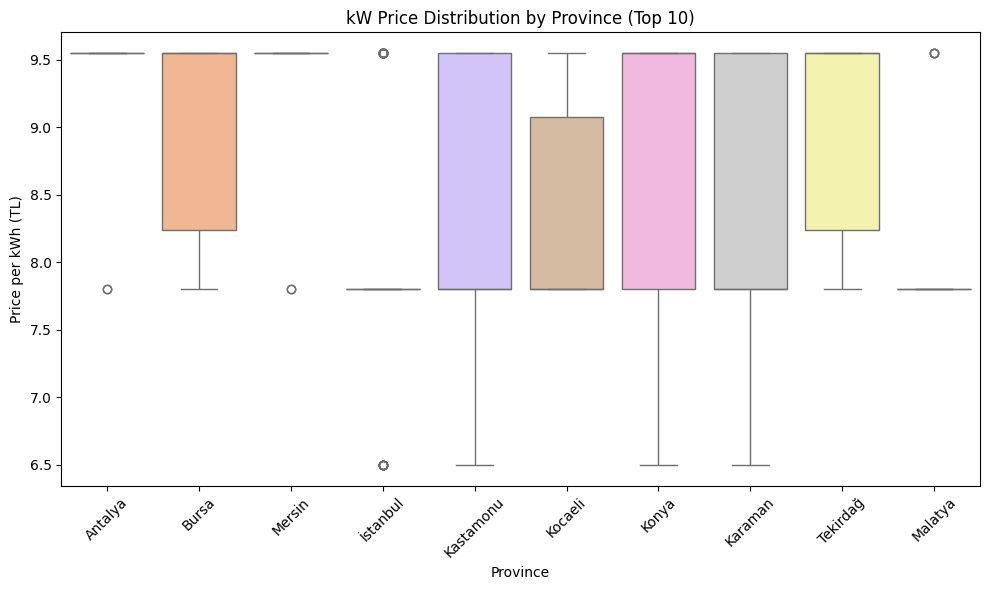

In [20]:
# --- kW Price Distribution by Province (Boxplot) ---
plt.figure(figsize=(10,6))
selected_provinces = df['tesis_il'].value_counts().head(10).index  # Top 10 for clarity
sns.boxplot(x='tesis_il', y='kW_ucret', data=df[df['tesis_il'].isin(selected_provinces)], palette='pastel')
plt.title('kW Price Distribution by Province (Top 10)')
plt.xlabel('Province')
plt.ylabel('Price per kWh (TL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

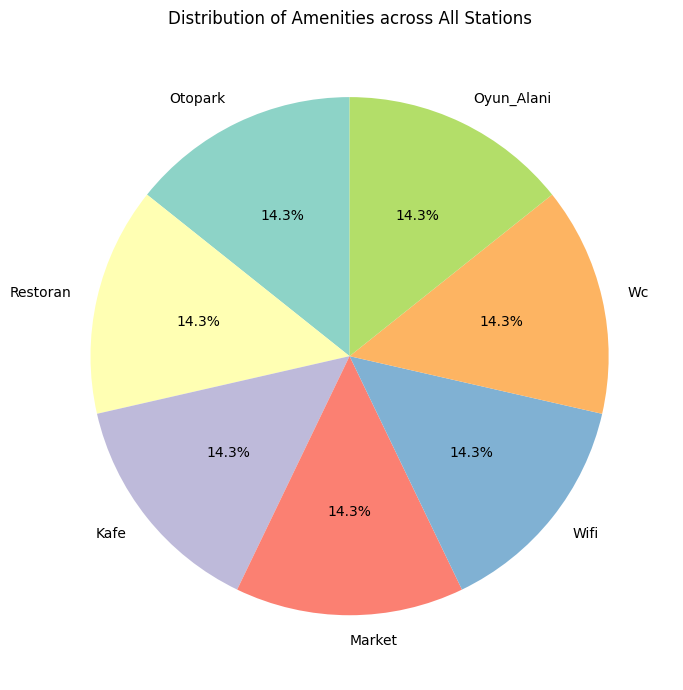

In [21]:
# --- Amenities Distribution (Pie Chart) ---
services_total = df[service_cols].notnull().sum()
plt.figure(figsize=(7,7))
plt.pie(services_total, labels=services_total.index.str.title(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Distribution of Amenities across All Stations')
plt.tight_layout()
plt.show()

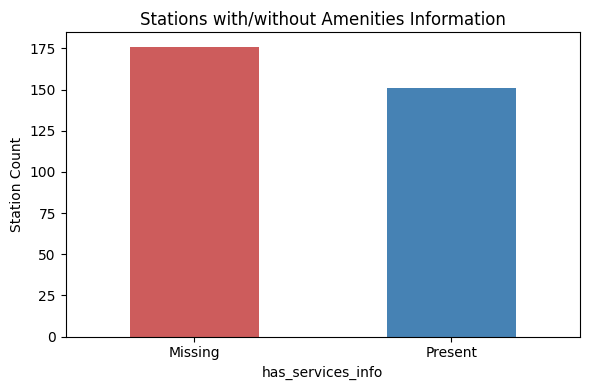

In [22]:
# --- Information Completeness: Amenities Data Presence ---
services_count = df['has_services_info'].value_counts()
plt.figure(figsize=(6,4))
services_count.plot(kind='bar', color=['indianred', 'steelblue'])
plt.title('Stations with/without Amenities Information')
plt.xticks([0,1], ['Missing', 'Present'], rotation=0)
plt.ylabel('Station Count')
plt.tight_layout()
plt.show()

# 8. Clustering Charging Stations by Service Diversity

In this section, we cluster charging stations based on the number and type of amenities they offer, using K-means clustering. This helps identify "full-featured" vs. "basic" stations and spot patterns by region or operator.

---

# 8.1. Preparing Data for Clustering

In [23]:
# Define amenity columns and select only rows with at least one amenity
service_cols = ['otopark', 'restoran', 'kafe', 'market', 'wifi', 'wc', 'oyun_alani']
clustering_df = df[service_cols].fillna(False)
clustering_df = clustering_df.astype(int).infer_objects(copy=False)
clustering_df = clustering_df[clustering_df.sum(axis=1) > 0]

/var/folders/hp/4691ncsd3fg95zjt0t_f75h80000gn/T/ipykernel_64200/3321285451.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clustering_df = df[service_cols].fillna(False)


# 8.2. Standardization and Elbow Method for Optimal k

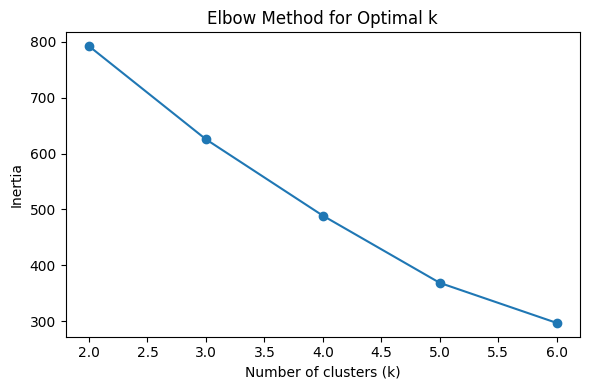

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

if clustering_df.shape[0] < 3:
    print("Not enough data with at least one amenity for clustering.")
else:
    # Add total number of amenities
    clustering_df['num_services'] = clustering_df.sum(axis=1)

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(clustering_df)

    # Elbow method
    inertia = []
    k_range = range(2, min(7, clustering_df.shape[0]))
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(X_scaled)
        inertia.append(km.inertia_)

    plt.figure(figsize=(6,4))
    plt.plot(k_range, inertia, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.tight_layout()
    plt.show()

    warnings.filterwarnings('ignore')

# 8.3. KMeans Clustering and Assigning Cluster Labels

In [27]:
# Choose k (e.g., 3)
k = 3 if clustering_df.shape[0] >= 3 else clustering_df.shape[0]
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clustering_df['cluster'] = kmeans.fit_predict(X_scaled)
df.loc[clustering_df.index, 'cluster'] = clustering_df['cluster']

# 8.4. Cluster Analysis and Visualization

cluster
2    71
1    42
0    28
Name: count, dtype: int64
          otopark  restoran      kafe    market      wifi        wc  \
cluster                                                               
0        1.000000  0.928571  0.678571  0.321429  0.857143  1.000000   
1        0.000000  0.142857  0.095238  0.333333  0.047619  0.904762   
2        0.957746  0.633803  0.830986  0.352113  0.000000  1.000000   

         oyun_alani  num_services  
cluster                            
0          0.392857     10.357143  
1          0.000000      3.047619  
2          0.000000      7.549296  


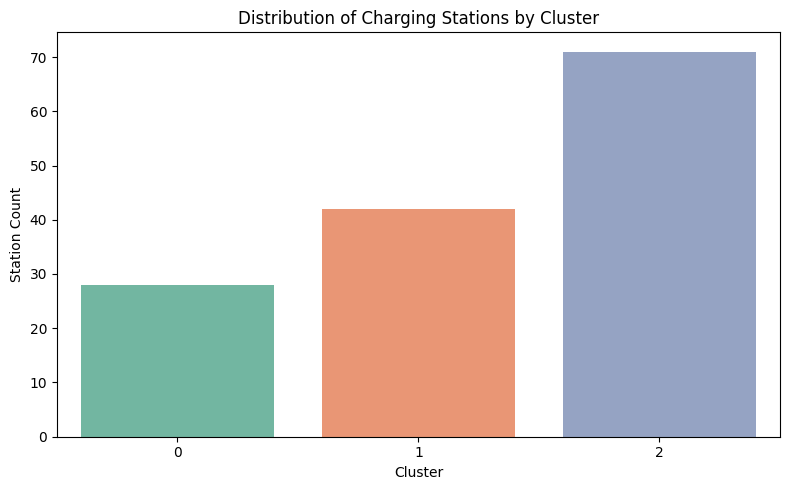

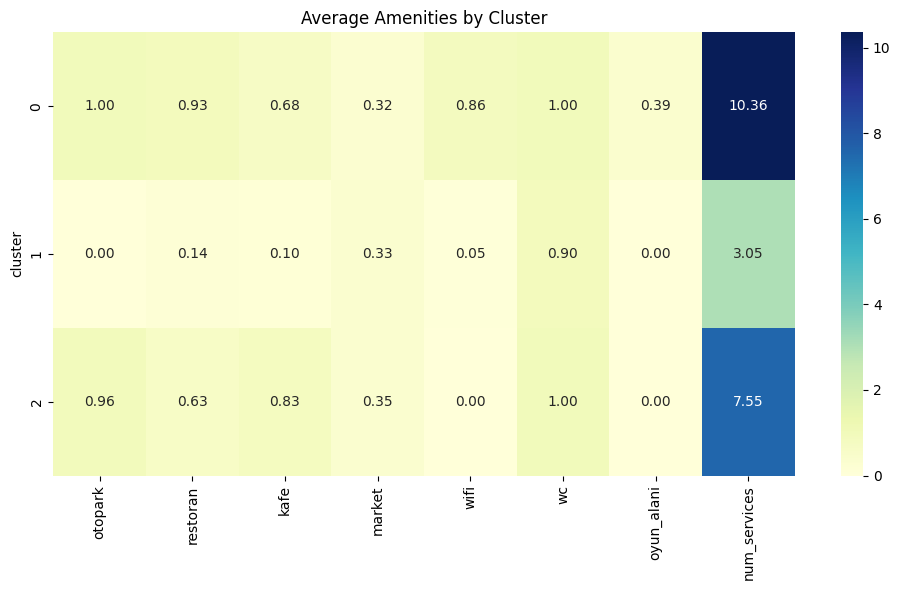

In [28]:
# Cluster summary
print(clustering_df['cluster'].value_counts())
cluster_summary = clustering_df.groupby('cluster')[service_cols + ['num_services']].mean()
print(cluster_summary)

import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', data=clustering_df, palette='Set2')
plt.title('Distribution of Charging Stations by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Station Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Amenities by Cluster')
plt.tight_layout()
plt.show()

# 9. Conclusions

Our analysis of EV charging stations in Turkey, based on a real operator dataset, yielded several key insights:

- **Station segmentation:** Clustering revealed three major station types: (i) “Full-featured” stations (offering almost every amenity), (ii) “Standard” stations (offering most essential services), and (iii) “Basic” stations (minimal services).
- **Amenities landscape:** WC, parking, and café amenities were most common, but features like WiFi or playgrounds were rare. Only a small fraction of stations were truly “full-featured.”
- **Geographical patterns:** Station and service diversity was highest in major urban provinces, but many smaller provinces had only “basic” stations.
- **Pricing:** There was a weak positive relationship between the number of amenities and kWh price, but price variation was mostly explained by operator policy and location rather than services.
- **Data quality:** Service (amenity) information was missing for some stations, which may impact the analysis.

The findings highlight significant variation in the service experience across Turkey and provide actionable insights for operators seeking to improve EV infrastructure.

---

# 10. Limitations

- **Data completeness:** Amenity/service information was missing for a significant number of stations. Our analysis is therefore limited to the subset with complete data.
- **Temporal aspects:** All analyses are based on a single snapshot of the data (no temporal or usage patterns were included).
- **External factors:** We did not integrate other contextual data such as traffic, EV adoption rate, or population density, which could influence both service diversity and pricing.
- **Generalizability:** The results apply primarily to stations from the studied operator and may not generalize to all CPOs in Turkey.

---

# 11. Future Work

- **Data enrichment:** Combine charging station data with city demographics, EV ownership rates, or traffic volume to understand regional needs more deeply.
- **Time series analysis:** Use historical or real-time usage data to analyze demand patterns and inform infrastructure planning.
- **User-focused metrics:** Collect and analyze data on user satisfaction, session durations, and peak usage times.
- **Comparative studies:** Extend the analysis to include multiple CPOs or international benchmarks.